<a href="https://colab.research.google.com/github/shaikh-rumiza-shakeel/github-notebooks/blob/master/Product_Category_Prediction_in_the_Luxury_Fashion_industry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Pandas:

Used for data manipulation and analysis, especially for handling structured data like CSV files.

In [2]:
import pandas as pd

## NumPy:

Provides support for large, multi-dimensional arrays and matrices, along with a collection of mathematical functions to operate on these arrays.

In [3]:
import numpy as np

## scikit-learn:

A powerful machine learning library that contains various tools for data preprocessing, model building, and evaluation.

In [4]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## matplotlib:

Used for data visualization and creating plots and charts.

In [5]:
import matplotlib.pyplot as plt

## seaborn:

A higher-level interface to matplotlib that simplifies creating attractive statistical visualizations.

In [6]:
import seaborn as sns

## nltk (Natural Language Toolkit):

A library for natural language processing (NLP) that provides tools for text processing and analysis.

In [7]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

## re (Regular Expressions):

A library for working with regular expressions, which can be helpful for text preprocessing.

In [8]:
import re

## warnings:

Used to handle warning messages that may arise during data processing.

In [9]:
import warnings
warnings.filterwarnings("ignore")

## Library Installation Check

You can use a try and except block to check for the import of each library, and if it throws an ImportError, it means the library is not installed. Here's an example code to test the installation of the libraries mentioned earlier:

In [10]:
import importlib

# List of libraries to check for installation
required_libraries = [
    'pandas',
    'numpy',
    'scikit-learn',
    'matplotlib',
    'seaborn',
    'nltk',
    'requests',     # Additional library 1
    'beautifulsoup4'   # Additional library 2
]

# Function to check if a library is installed
def check_library(library_name):
    try:
        importlib.import_module(library_name)
        print(f"{library_name} is installed.")
    except ImportError:
        print(f"{library_name} is not installed.")

# Check each library
for library in required_libraries:
    check_library(library)

pandas is installed.
numpy is installed.
scikit-learn is not installed.
matplotlib is installed.
seaborn is installed.
nltk is installed.
requests is installed.
beautifulsoup4 is not installed.


## Data Loading and Exploration.

In this step, we'll load the dataset on Luxury Apparels into a pandas DataFrame and perform some initial data exploration to understand its structure and content.

Assuming your dataset is stored in a CSV file named "Luxury_Products_Apparel_Data.csv," here's the code to get started:

In [11]:
# Step 1: Data Loading
# Replace 'path_to_csv_file' with the actual path to your CSV file
df = pd.read_csv('/content/drive/MyDrive/Luxury_Products_Apparel_Data.csv')

# Step 2: Data Exploration
# Display the first few rows of the DataFrame to get an overview of the data
print(df.head(10))

# Check the summary statistics of the numerical columns (if any)
print(df.describe())

# Check the data types of each column and identify missing values (if any)
print(df.info())

# Check the distribution of product categories in the dataset
print(df['Category'].value_counts())

   Unnamed: 0       Category       SubCategory  \
0        8037    Accessories              Bags   
1       13670    Accessories             Socks   
2       13983          Suits           Tuxedos   
3       12081    Accessories            Gloves   
4       15617    Accessories         Cufflinks   
5       16763  Jackets/Coats        Overshirts   
6         344    Accessories            Gloves   
7        9492     Activewear      Active Pants   
8       11545    Accessories  Tech Accessories   
9       12826    Accessories              Ties   

                                         ProductName  \
0                     "Prada Striped Shell Belt Bag"   
1  "Falke - Lhasa Wool And Cashmere-blend Socks -...   
2                    "peak lapel tuxedo suit jacket"   
3                "Thom Browne Navy 4-Bar Rib Gloves"   
4  "Alice Made This - Bayley Round Patina-brass C...   
5  "Jacquemus - Valensole Mottled Cotton-twill Ov...   
6           "Bode Off-White Sherpa Half-Zip Mittens"   
7

In this code, we use pandas to read the CSV file into a DataFrame named df. We then display the first few rows of the DataFrame using the head() method to get a glimpse of the data's structure. Next, we use the describe() method to see summary statistics of the numerical columns (if any) in the dataset. The info() method provides information about the data types of each column and identifies any missing values.

Finally, we use the value_counts() method to check the distribution of product categories in the dataset. This will give us an idea of the class distribution and help us identify if there is any class imbalance.

## Data Preprocessing

In the Data Preprocessing step, we'll clean and prepare the text data (product names and descriptions) for feature engineering and model training. We'll perform tasks such as lowercasing, removing special characters, tokenization, removing stopwords, and optional stemming or lemmatization.

In [12]:
import nltk
nltk.download('wordnet')

# Step 1: Data Preprocessing
# Lowercase the text data
df['ProductName'] = df['ProductName'].str.lower()
df['Description'] = df['Description'].str.lower()

# Remove special characters and numbers
df['ProductName'] = df['ProductName'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))
df['Description'] = df['Description'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))

# Tokenization
df['ProductName'] = df['ProductName'].apply(lambda x: word_tokenize(x))
df['Description'] = df['Description'].apply(lambda x: word_tokenize(x))

# Remove stopwords
stop_words = set(stopwords.words('english'))
df['ProductName'] = df['ProductName'].apply(lambda x: [word for word in x if word not in stop_words])
df['Description'] = df['Description'].apply(lambda x: [word for word in x if word not in stop_words])

# Optional: Stemming or Lemmatization (choose either one)
# Example using Porter Stemmer
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
df['ProductName'] = df['ProductName'].apply(lambda x: [stemmer.stem(word) for word in x])
df['Description'] = df['Description'].apply(lambda x: [stemmer.stem(word) for word in x])

# Example using WordNet Lemmatizer
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
df['ProductName'] = df['ProductName'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
df['Description'] = df['Description'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

# Join the tokens back into strings
df['ProductName'] = df['ProductName'].apply(lambda x: ' '.join(x))
df['Description'] = df['Description'].apply(lambda x: ' '.join(x))

# Display the preprocessed DataFrame
print(df.head())

[nltk_data] Downloading package wordnet to /root/nltk_data...


   Unnamed: 0     Category SubCategory  \
0        8037  Accessories        Bags   
1       13670  Accessories       Socks   
2       13983        Suits     Tuxedos   
3       12081  Accessories      Gloves   
4       15617  Accessories   Cufflinks   

                                         ProductName  \
0                        prada stripe shell belt bag   
1        falk lhasa wool cashmereblend sock men navi   
2                      peak lapel tuxedo suit jacket   
3                      thom brown navi bar rib glove   
4  alic made bayley round patinabrass cufflink me...   

                                         Description  
0  one prada function design belt bag made weathe...  
1  falk casual yet luxuri falk dark navi lhasa so...  
2  white black linen blend peak lapel tuxedo suit...  
3  pair rib knit cashmer glove navi signatur stri...  
4  alic made made uk teal bayley cufflink alic ma...  


To check the size of your dataset in terms of rows and columns, you can use the shape attribute of the pandas DataFrame. The shape attribute returns a tuple representing the dimensions of the DataFrame, where the first element is the number of rows and the second element is the number of columns.

Here's the code to check the size of your dataset:

In [13]:
# Get the size of the dataset
num_rows, num_columns = df.shape

print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

Number of rows: 5000
Number of columns: 5


## Feature engineering

Feature engineering is a crucial step in preparing the text data for model training. In this step, we'll convert the preprocessed text data into numerical representations that machine learning models can process effectively. One common technique for this task is using the TF-IDF (Term Frequency-Inverse Document Frequency) vectorizer, which converts text data into a sparse matrix of numerical features.

Here's the code for Feature Engineering using TF-IDF:

In [14]:
# Step 3: Feature Engineering with TF-IDF
# Combine ProductName and Description into a single text column
df['Text'] = df['ProductName'] + ' ' + df['Description']

# Initialize the TF-IDF vectorizer with max_features (max unique words) as needed
max_features = 5000
tfidf_vectorizer = TfidfVectorizer(max_features=max_features)

# Fit and transform the text data into TF-IDF numerical representation
X_tfidf = tfidf_vectorizer.fit_transform(df['Text']).toarray()

# Separate the target labels (Category) from the features
y = df['Category']

# Display the TF-IDF feature matrix
print(pd.DataFrame(X_tfidf, columns=tfidf_vectorizer.get_feature_names_out()))

      abil  abl  abloh  abras  abroad  absolut  absorb  abstract  \
0      0.0  0.0    0.0    0.0     0.0      0.0     0.0       0.0   
1      0.0  0.0    0.0    0.0     0.0      0.0     0.0       0.0   
2      0.0  0.0    0.0    0.0     0.0      0.0     0.0       0.0   
3      0.0  0.0    0.0    0.0     0.0      0.0     0.0       0.0   
4      0.0  0.0    0.0    0.0     0.0      0.0     0.0       0.0   
...    ...  ...    ...    ...     ...      ...     ...       ...   
4995   0.0  0.0    0.0    0.0     0.0      0.0     0.0       0.0   
4996   0.0  0.0    0.0    0.0     0.0      0.0     0.0       0.0   
4997   0.0  0.0    0.0    0.0     0.0      0.0     0.0       0.0   
4998   0.0  0.0    0.0    0.0     0.0      0.0     0.0       0.0   
4999   0.0  0.0    0.0    0.0     0.0      0.0     0.0       0.0   

      abstractblackblu  abstractblackredwhit  ...  zipdetail  zipfasten  \
0                  0.0                   0.0  ...        0.0        0.0   
1                  0.0           

In this code, we first load the dataset and preprocess the text data using the same steps as before. We then combine the preprocessed Product_Name and Product_Description columns into a single text column named Text, as TF-IDF works on single text inputs.

Next, we initialize the TF-IDF vectorizer with a maximum number of features (max_features) that you can adjust based on your dataset size and complexity. The TF-IDF vectorizer will convert the text data into a numerical matrix representation.

Finally, we fit and transform the text data using the TF-IDF vectorizer to obtain the X_tfidf matrix, which represents the features for model training. The target labels (product categories) are separated into the y variable.

We obtain the TF-IDF feature matrix X_tfidf and the target labels y. These are the inputs you'll use to train your multiclass classification model.

If you encounter an "Input contains NaN" error during the Train-Test Split step, it means that there are missing values (NaN) in your dataset. Missing values can disrupt the data split process as scikit-learn cannot handle NaN values in its algorithms.

To address this issue, you should handle the missing values in your dataset before performing the Train-Test Split. Here's how you can do it:

Check for Missing Values:
Before the Train-Test Split, check for missing values in your DataFrame using the isnull() method followed by sum().

Handle Missing Values:
Depending on the extent and nature of missing values, you can choose to either remove rows with missing values or fill them with appropriate values (e.g., mean, median, or mode).

Let's modify the code to handle missing values:

In [15]:
# Step 4: Handle Missing Values
# Check for missing values in the DataFrame
print(df.isnull().sum())

# Fill missing values with a default value (e.g., an empty string)
df.fillna('', inplace=True)

Unnamed: 0      0
Category       37
SubCategory    37
ProductName     0
Description     0
Text            0
dtype: int64


## Train-Test Split

 In the Train-Test Split step, we'll divide the dataset into training and testing sets to train the model on one portion of the data and evaluate its performance on another, unseen portion of the data. This will help us assess how well the model generalizes to new, unseen examples.

We'll use the train_test_split function from scikit-learn to perform the split. Let's go ahead and implement it:

In [16]:
# Separate the target labels (Category) from the features (X_tfidf)
y = df['Category']
X = X_tfidf

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Display the shapes of the training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (4000, 5000)
Shape of X_test: (1000, 5000)
Shape of y_train: (4000,)
Shape of y_test: (1000,)


In this modified code, we first check for missing values in the DataFrame using df.isnull().sum(). Depending on the output, you can decide how to handle the missing values. For demonstration purposes, we fill the missing values with an empty string using df.fillna('', inplace=True).

Once the missing values are handled, the Train-Test Split should work correctly. Run this modified code in a Colab cell, and it should perform the Train-Test Split as intended.

## Model Selection and Training

In the Model Selection and Training step, we'll choose a suitable multiclass classification algorithm and train it on the training dataset (X_train and y_train). Let's start with a simple yet effective algorithm called the Support Vector Machine (SVM).

Here's how you can implement Model Selection and Training using SVM:

In [26]:
# Step 6: Model Selection and Training (SVM)
# Create an instance of the SVM classifier
svm_classifier = SVC(kernel='linear', random_state=42)

# Train the SVM classifier on the training data
svm_classifier.fit(X_train, y_train)

# Step 7: Model Evaluation
# Make predictions on the test data
y_pred = svm_classifier.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Display classification report and confusion matrix for more detailed evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.96
Classification Report:
                          precision    recall  f1-score   support

                              1.00      0.71      0.83         7
            Accessories       0.97      0.98      0.97       255
             Activewear       0.92      0.95      0.94       108
          Jackets/Coats       0.94      0.94      0.94        63
                Jewelry       0.94      0.85      0.89        20
                  Pants       0.94      0.91      0.93       103
                 Shirts       0.93      0.96      0.95       114
                  Shoes       1.00      0.99      0.99       210
                  Suits       0.97      0.97      0.97        39
               Sweaters       1.00      0.93      0.96        28
Underwear and Nightwear       0.98      0.96      0.97        53

               accuracy                           0.96      1000
              macro avg       0.96      0.92      0.94      1000
           weighted avg       0.96      0.96     

We create an instance of the Support Vector Machine (SVM) classifier with SVC(kernel='linear', random_state=42). We choose the linear kernel for simplicity, but you can experiment with other kernels (e.g., 'rbf', 'poly', etc.) as well.

We then train the SVM classifier using the training data (X_train, y_train) with the fit() method.

After training, we make predictions on the test data (X_test) using the trained SVM classifier. We calculate the accuracy of the model using accuracy_score.

Additionally, we display the classification report and confusion matrix to get a more detailed evaluation of the model's performance, including precision, recall, and F1-score for each class.

We train the SVM model on the training data and evaluate its performance on the testing data. You now have a trained SVM model that can predict the product category based on the product names and descriptions.

## Model Evaluation

In the Model Evaluation step, we will assess the performance of the trained SVM model on the testing data (X_test and y_test). We'll calculate various evaluation metrics to understand how well the model is performing in predicting the product categories.

We have already calculated the accuracy in the previous step. Now, let's calculate other important metrics like precision, recall, F1-score, and display the confusion matrix.

Here's the code for Model Evaluation using the trained SVM model:

In [27]:
# Step 7: Model Evaluation
# Make predictions on the test data
y_pred = svm_classifier.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Display classification report and confusion matrix for more detailed evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.96
Classification Report:
                          precision    recall  f1-score   support

                              1.00      0.71      0.83         7
            Accessories       0.97      0.98      0.97       255
             Activewear       0.92      0.95      0.94       108
          Jackets/Coats       0.94      0.94      0.94        63
                Jewelry       0.94      0.85      0.89        20
                  Pants       0.94      0.91      0.93       103
                 Shirts       0.93      0.96      0.95       114
                  Shoes       1.00      0.99      0.99       210
                  Suits       0.97      0.97      0.97        39
               Sweaters       1.00      0.93      0.96        28
Underwear and Nightwear       0.98      0.96      0.97        53

               accuracy                           0.96      1000
              macro avg       0.96      0.92      0.94      1000
           weighted avg       0.96      0.96     

In this code, we first load the dataset, preprocess the text data, perform feature engineering using TF-IDF, and handle missing values if necessary. Then, we split the data into training and testing sets and train the SVM model as we did before.

Next, we make predictions on the test data (X_test) using the trained SVM classifier and store the predictions in y_pred.

We then calculate the accuracy of the model using accuracy_score, as we did in the previous step.

Additionally, we display the classification report using classification_report, which provides precision, recall, F1-score, and support for each class in the test data. The classification report gives a more comprehensive evaluation of the model's performance for each product category.

Lastly, we display the confusion matrix using confusion_matrix. The confusion matrix shows the number of true positive, true negative, false positive, and false negative predictions for each class, allowing you to assess the model's performance in detail.

We evaluate the trained SVM model on the testing data. You'll get a detailed report of various metrics, enabling you to understand how well the model is performing in predicting the product categories.

## Confusion Matrix Heatmap

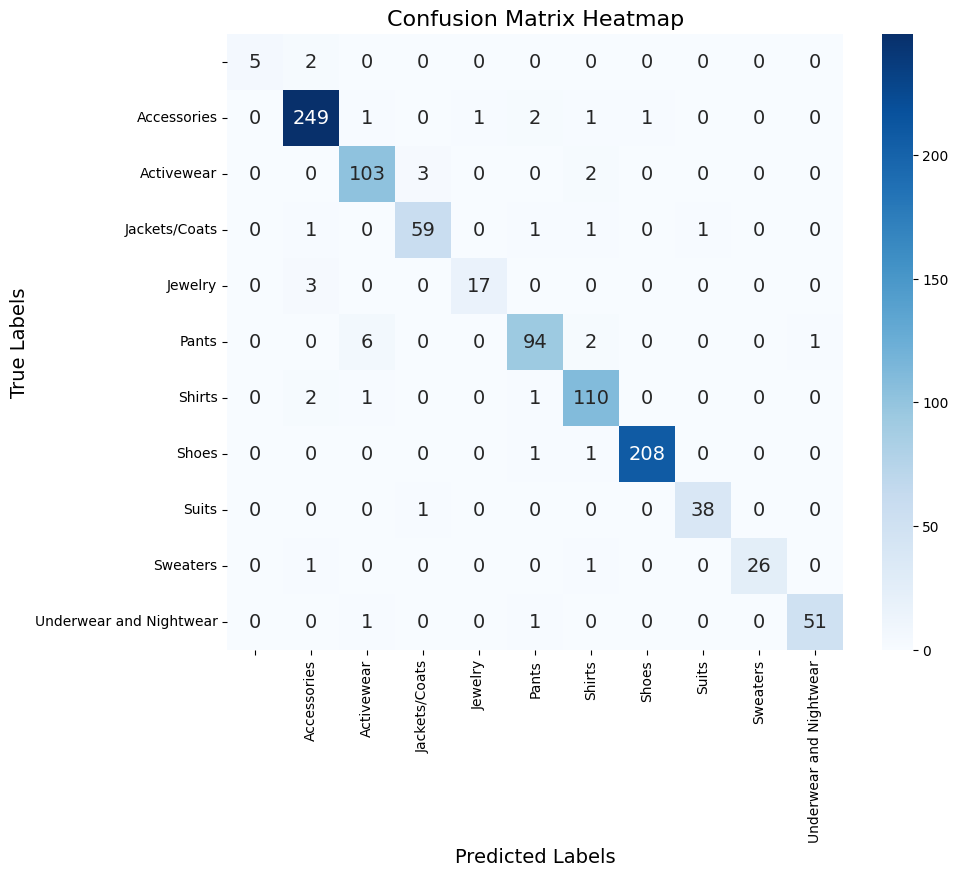

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have already trained and evaluated your model, and you have the true and predicted labels
y_true = y_test  # Replace [...] with your true labels (ground truth)
y_pred = svm_classifier.predict(X_test)  # Replace [...] with your predicted labels

# Create the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Get the unique class labels
class_labels = sorted(list(set(y_true)))

# Create a DataFrame from the confusion matrix
cm_df = pd.DataFrame(cm, index=class_labels, columns=class_labels)

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues", cbar=True, square=True, annot_kws={"size": 14})
plt.xlabel("Predicted Labels", fontsize=14)
plt.ylabel("True Labels", fontsize=14)
plt.title("Confusion Matrix Heatmap", fontsize=16)
plt.show()

This code generates a heatmap showing the confusion matrix, with the true labels on the y-axis and the predicted labels on the x-axis. The values inside each cell of the heatmap represent the number of instances where a sample of the true label was predicted as the corresponding predicted label.

## Bar Charts for Class Distribution

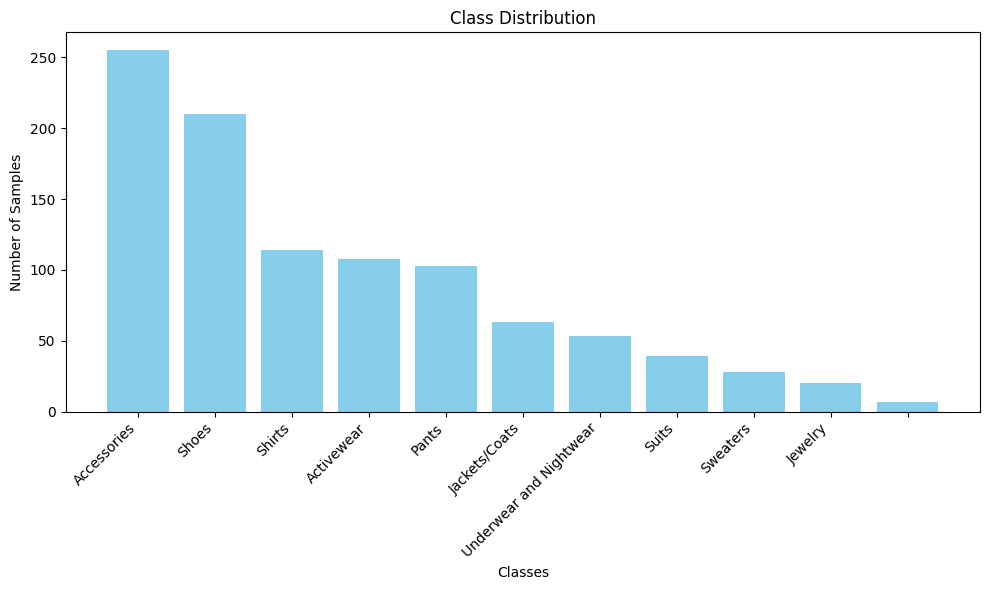

In [43]:
# Assuming you have your true labels in y_true as a list or numpy array
# Replace [...] with your actual true labels
y_true = y_test

# Create a pandas DataFrame to analyze class distribution
class_distribution_df = pd.DataFrame({'Class': y_true})

# Count the number of samples in each class
class_counts = class_distribution_df['Class'].value_counts()

# Sort the classes by count (optional, but can be useful for better visualization)
class_counts = class_counts.sort_values(ascending=False)

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(class_counts.index, class_counts.values, color='skyblue')
plt.xlabel('Classes')
plt.ylabel('Number of Samples')
plt.title('Class Distribution')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent label cutoffs
plt.show()

In this code, we first create a pandas DataFrame (class_distribution_df) using the true labels (y_true). Then, we use the value_counts() function to count the number of occurrences of each class in the DataFrame, which represents the class distribution.

The class_counts variable will hold the counts of each class. We can optionally sort the classes by count (descending) for better visualization using the sort_values() function.

Finally, we use matplotlib to plot the bar chart, where the x-axis represents the classes and the y-axis represents the number of samples in each class.

## Word Cloud for Product Descriptions

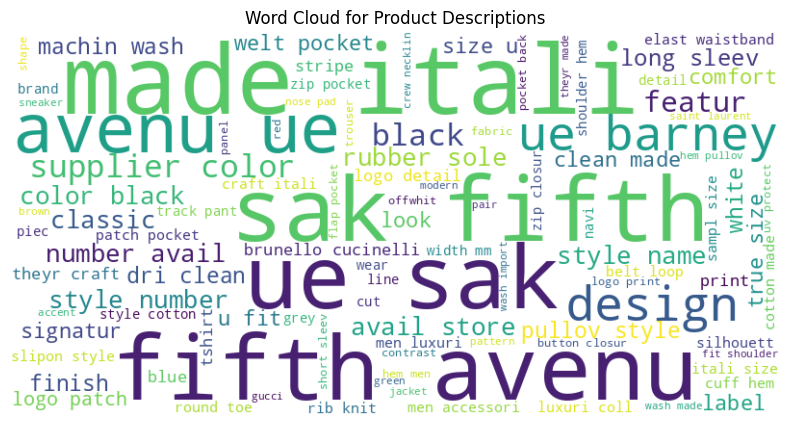

In [47]:
from wordcloud import WordCloud

product_descriptions = df['Description'].dropna().values

# Combine all product descriptions into a single string
text = ' '.join(product_descriptions)

# Create a WordCloud object with optional custom settings (font_path, background_color, colormap, etc.)
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis',
                      max_words=100, max_font_size=100, random_state=42).generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axis
plt.title('Word Cloud for Product Descriptions')
plt.show()

We create a WordCloud object with optional custom settings. You can customize the appearance of the word cloud by modifying the parameters such as width, height, background_color, colormap, max_words, max_font_size, etc. Feel free to experiment with these settings to achieve the desired visual effect.

Finally, we use matplotlib to plot the word cloud image.

The word cloud will display the most frequent words from the product descriptions, with more frequent words appearing larger and less frequent words appearing smaller.

Please note that the quality of the word cloud will depend on the amount and variety of text data you have. Ensure that you have a sufficient amount of text to generate meaningful insights.